In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
#file_path = "D:/Data_Analyst_Quantium/"
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")

In [13]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [14]:
customer_data = pd.read_csv( "QVI_purchase_behaviour.csv")

In [15]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [16]:
#SUMMARIZE DATASET

In [17]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [18]:
transaction_data.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [19]:
data_types = transaction_data.dtypes
print(data_types)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [20]:
#EXAMINE THE OUTLINE

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

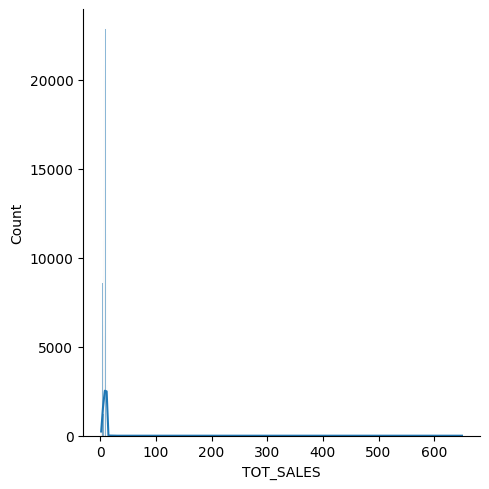

In [22]:
sns.displot(transaction_data.TOT_SALES, kde = True)

In [27]:
product_sales = transaction_data.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False)
print(product_sales)

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
                                             ...   
WW Crinkle Cut      Chicken 175g             4702.2
Sunbites Whlegrn    Crisps Frch/Onin 90g     4600.2
WW Crinkle Cut      Original 175g            4532.2
Woolworths Mild     Salsa 300g               4234.5
Woolworths Medium   Salsa 300g               4050.0
Name: TOT_SALES, Length: 114, dtype: float64


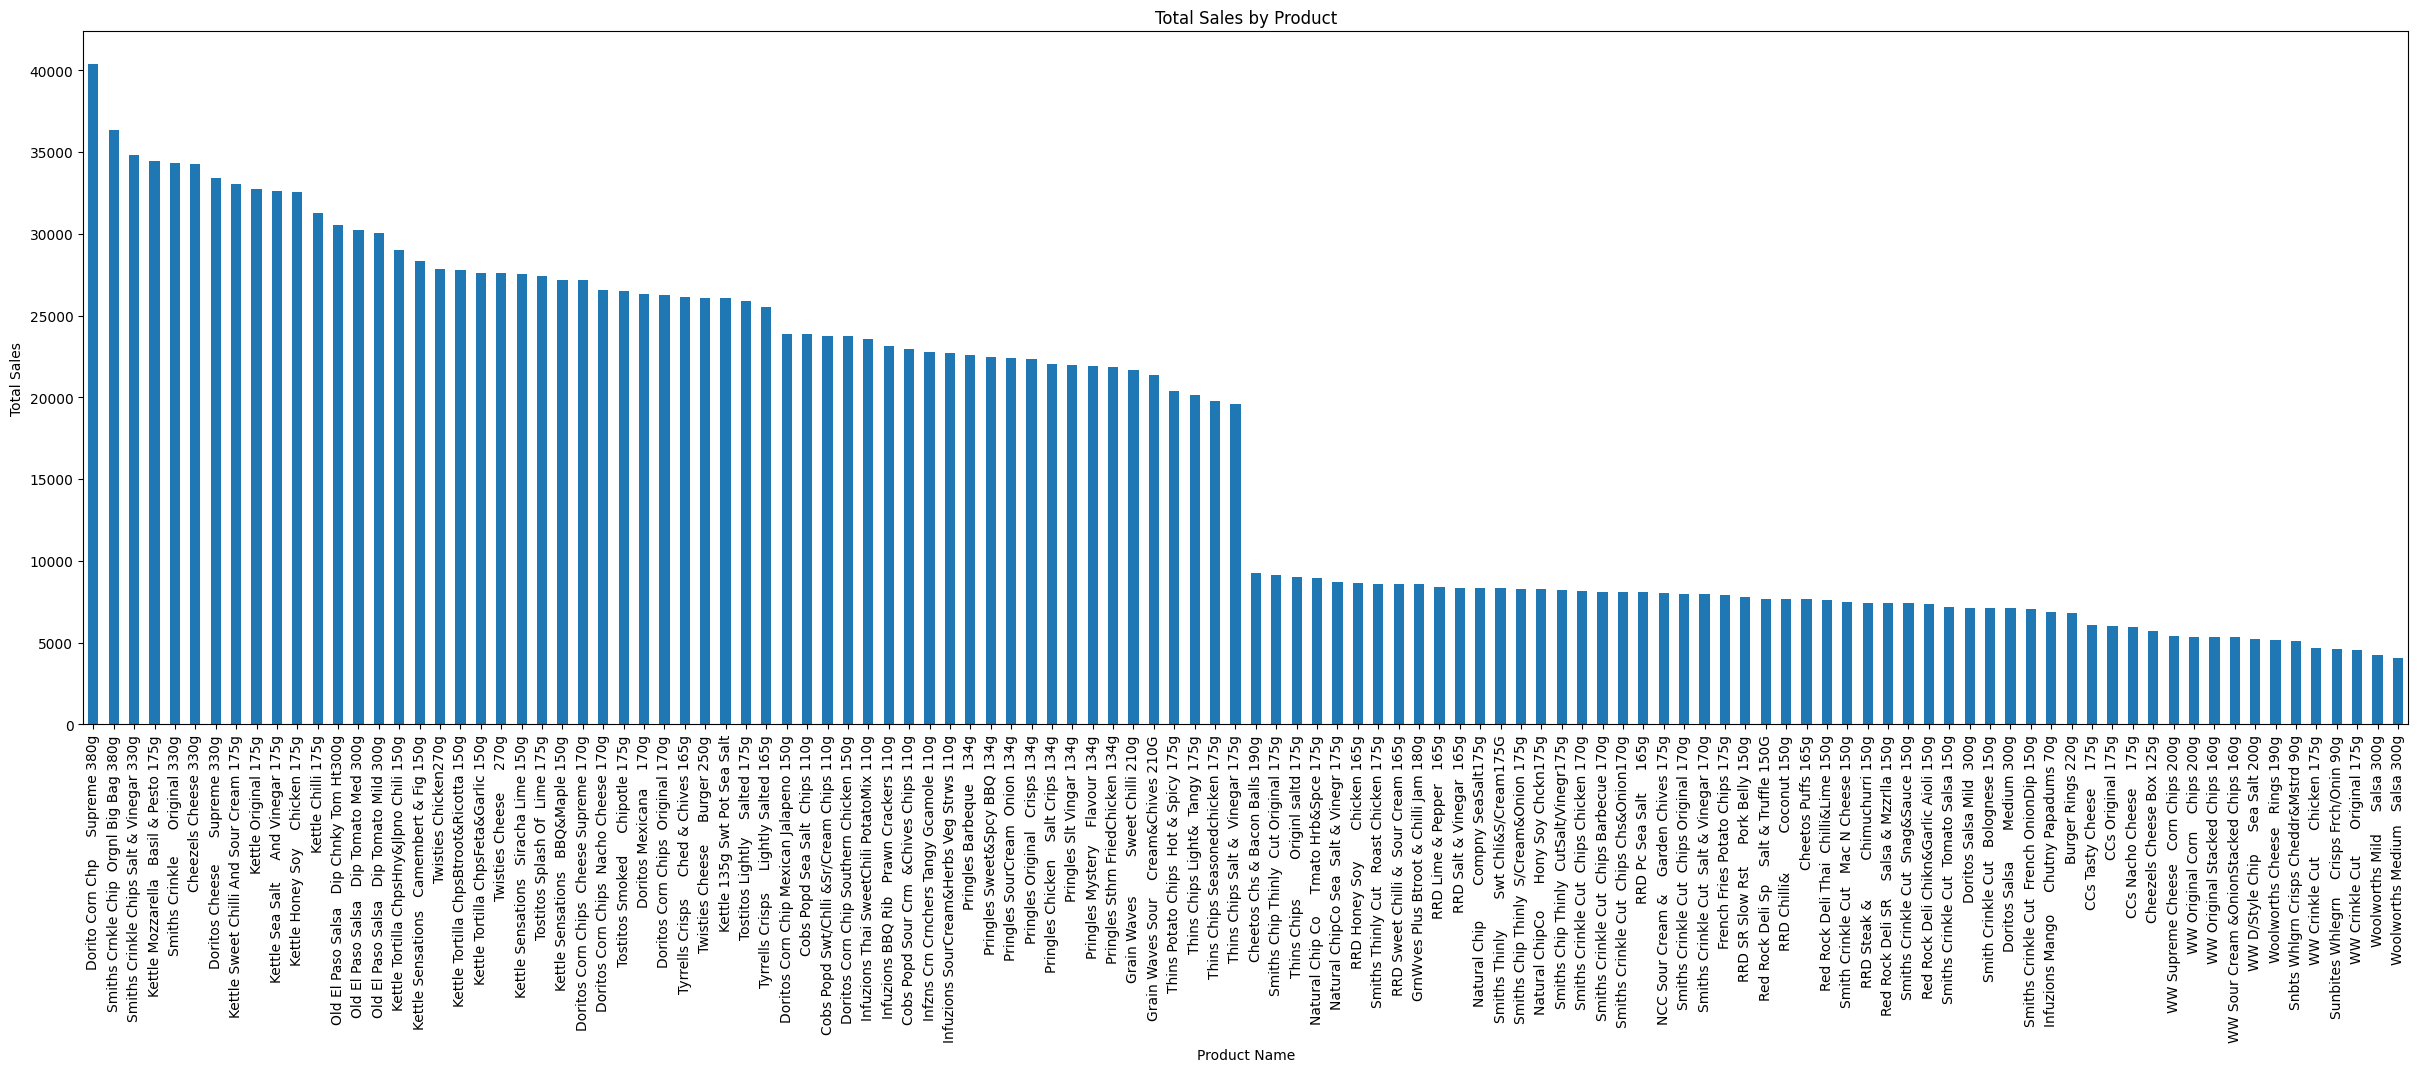

In [33]:
product_sales.plot(kind='bar', figsize=(30, 9))
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.xticks(rotation=90)
plt.show()

In [34]:
customer_sales = transaction_data.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False)
print(customer_sales)

LYLTY_CARD_NBR
226000    1300.0
230078     138.6
63197      132.8
259009     127.2
162039     126.8
           ...  
51251        1.5
41089        1.5
2272         1.5
186361       1.5
6074         1.5
Name: TOT_SALES, Length: 72637, dtype: float64


In [23]:
numericdata = transaction_data.select_dtypes(['float', 'int'])
numericdata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,2,6.0
1,43599,1,1307,348,66,3,6.3
2,43605,1,1343,383,61,2,2.9
3,43329,2,2373,974,69,5,15.0
4,43330,2,2426,1038,108,3,13.8


In [24]:
x = numericdata[numericdata['TOT_SALES'] < 8.000]


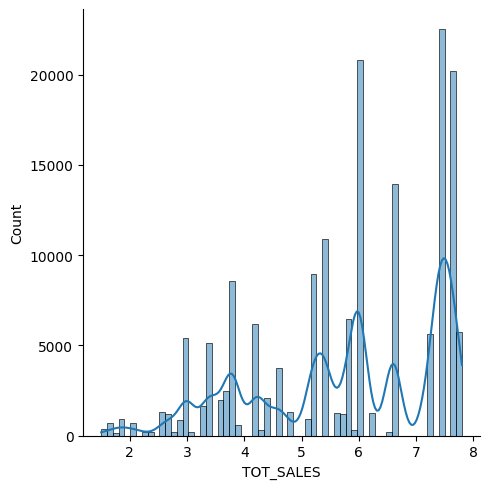

In [25]:
sns.displot(x.TOT_SALES, kde = True)

<Axes: ylabel='TOT_SALES'>

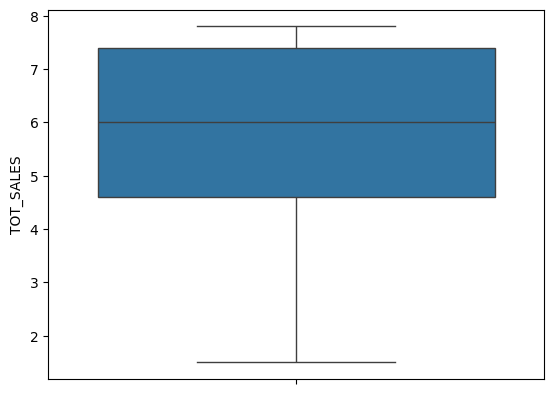

In [26]:
sns.boxplot(x.TOT_SALES)